## Function Overview

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from datetime import datetime 
API_KEY = '09d7859f71b9796ca3b1e0c50da15d5b'
plt.style.use('ggplot')

# API Category Query


this function gets name and id for a single category, and also lists its children categories' names and ids.

`http://api.eia.gov/category/?api_key=YOUR_API_KEY_HERE[&category_id=nn][&out=xml|json]`

**category _id**: Optional. A unique numerical id of the category to fetch. If missing, the API's root category is fetched.

In [2]:
def get_category(category_id,api_key):
    '''
    input: category_id,api_key
    return: dict of category
    '''
    url = 'http://api.eia.gov/category/'
    payload = {'api_key':api_key,
               'category_id':category_id}
    r = requests.get(url, params=payload)
    return r.json()

In [3]:
category_id = '371'
eia = get_category(category_id,API_KEY)

In [4]:
pprint(eia)

{'category': {'category_id': '371',
              'childcategories': [{'category_id': 0, 'name': 'Electricity'},
                                  {'category_id': 40203,
                                   'name': 'State Energy Data System (SEDS)'},
                                  {'category_id': 711224,
                                   'name': 'Total Energy'},
                                  {'category_id': 714755, 'name': 'Petroleum'},
                                  {'category_id': 714804,
                                   'name': 'Natural Gas'},
                                  {'category_id': 717234, 'name': 'Coal'},
                                  {'category_id': 829714,
                                   'name': 'Short-Term Energy Outlook'},
                                  {'category_id': 964164,
                                   'name': 'Annual Energy Outlook'},
                                  {'category_id': 1292190,
                                   'name': '

---
# API Series Categories Query

This function gets a list of category names and IDs the series is a member of.

`http://api.eia.gov/series/categories/?series_id=&api_key=YOUR_API_KEY_HERE[&out=xml|json]`

**series_id**: Required. The series id (also called source key) is a case-insensitive string consisting of letters, numbers, dashes ("-") and periods (".") that uniquely identifies an EIA series.

In [5]:
def get_series(series_id,api_key):
    '''input: series_id, api_key
    return: dic of series_id'''
    url = 'http://api.eia.gov/series/'
    payload = {'api_key':api_key,
               'series_id':series_id}
    r = requests.get(url, params=payload)
    return r.json()

In [6]:
ser_id ='PET.EMA_EPM0_PWG_STX_DPG.A'
ser = get_series(ser_id,API_KEY)

In [7]:
pprint(ser)

{'request': {'command': 'series', 'series_id': 'PET.EMA_EPM0_PWG_STX_DPG.A'},
 'series': [{'copyright': 'None',
             'data': [['2017', 1.63],
                      ['2016', 1.375],
                      ['2015', 1.62],
                      ['2014', 2.55],
                      ['2013', 2.763],
                      ['2012', 2.874],
                      ['2011', 2.816],
                      ['2010', 2.1],
                      ['2009', 1.695],
                      ['2008', 2.543],
                      ['2007', 2.101],
                      ['2006', 1.918],
                      ['2005', 1.603],
                      ['2004', 1.197],
                      ['2003', 0.91],
                      ['2002', 0.759],
                      ['2001', 0.804],
                      ['2000', 0.885],
                      ['1999', 0.561],
                      ['1998', 0.463],
                      ['1997', 0.632],
                      ['1996', 0.641],
                      ['1995', 0.565

---
# Category to DataFrame

This function creates a dataframe from a request call

In [8]:
def df_category(dic):
    '''create dataframe from category'''
    # if not null, create childcategories df
    if len(dic['category']['childcategories']) is not 0:
        data = dic['category']['childcategories']
        df = pd.DataFrame.from_dict(data)  
    # if not null, create childseries df
    elif len(dic['category']['childseries']) is not 0:
        data = dic['category']['childseries']
        df = pd.DataFrame.from_dict(data)
    
    # if not null, create parent_id
    if dic['category']['parent_category_id'] is not None:
        parent_id = dic['category']['parent_category_id']
        df['parent_category_id'] = parent_id    
    # create name of dataset column
    name = dic['category']['name']
    name = name.replace(" ", "_")
    df['dataset'] = name
    return df

In [9]:
pprint(eia)

{'category': {'category_id': '371',
              'childcategories': [{'category_id': 0, 'name': 'Electricity'},
                                  {'category_id': 40203,
                                   'name': 'State Energy Data System (SEDS)'},
                                  {'category_id': 711224,
                                   'name': 'Total Energy'},
                                  {'category_id': 714755, 'name': 'Petroleum'},
                                  {'category_id': 714804,
                                   'name': 'Natural Gas'},
                                  {'category_id': 717234, 'name': 'Coal'},
                                  {'category_id': 829714,
                                   'name': 'Short-Term Energy Outlook'},
                                  {'category_id': 964164,
                                   'name': 'Annual Energy Outlook'},
                                  {'category_id': 1292190,
                                   'name': '

In [10]:
df_category(eia)

,category_id,name,dataset
0,0,Electricity,EIA_Data_Sets
1,40203,State Energy Data System (SEDS),EIA_Data_Sets
2,711224,Total Energy,EIA_Data_Sets
3,714755,Petroleum,EIA_Data_Sets
4,714804,Natural Gas,EIA_Data_Sets
5,717234,Coal,EIA_Data_Sets
6,829714,Short-Term Energy Outlook,EIA_Data_Sets
7,964164,Annual Energy Outlook,EIA_Data_Sets
8,1292190,Crude Oil Imports,EIA_Data_Sets
9,2123635,U.S. Electric System Operating Data,EIA_Data_Sets


---
# Series to DataFrame

This function returns a dataframe from a request call given a series_id.

In [11]:
def df_series(dic):
    '''input" dict
    output: dataframe
    convert dictionary data into dataframe'''
    # if statement to convert date
    if dic['series'][0]['f'] == 'M':
        #201002
        fmat = '%Y%m'
    else:
        fmat= None
    # select data
    plot_data = dic['series'][0]['data']
    # create dataframe
    df = pd.DataFrame.from_dict(plot_data)
    # rename cols
    df.rename(columns={0: 'date',1: 'value',}, 
              inplace=True)
    # change to datetime index
    df.date = pd.to_datetime(df['date'],format=fmat)
    df.set_index('date', inplace=True)
    df.sort_index(inplace=True)
    return df

In [12]:
df_series(ser)

,value
date,
1983-01-01,0.853
1984-01-01,0.802
1985-01-01,0.792
1986-01-01,0.479
1987-01-01,0.545
1988-01-01,0.522
1989-01-01,0.600
1990-01-01,0.742
1991-01-01,0.670


---
# Plot series

- This function returns a plot given a series request
- It extracts the name, data & units then returns a line graph from the data

In [13]:
def plot_series(dic):
    figs = (15,3)
    name = dic['series'][0]['name']
    units_desc = dic['series'][0]['units']
    units_short = dic['series'][0]['unitsshort']
    df = df_series(dic)
    ax =  df.plot(figsize=figs)
    ax.legend([units_short])
    ax.set_ylabel(units_desc)
    plt.title(name)
    #return df

In [14]:
pprint(ser)

{'request': {'command': 'series', 'series_id': 'PET.EMA_EPM0_PWG_STX_DPG.A'},
 'series': [{'copyright': 'None',
             'data': [['2017', 1.63],
                      ['2016', 1.375],
                      ['2015', 1.62],
                      ['2014', 2.55],
                      ['2013', 2.763],
                      ['2012', 2.874],
                      ['2011', 2.816],
                      ['2010', 2.1],
                      ['2009', 1.695],
                      ['2008', 2.543],
                      ['2007', 2.101],
                      ['2006', 1.918],
                      ['2005', 1.603],
                      ['2004', 1.197],
                      ['2003', 0.91],
                      ['2002', 0.759],
                      ['2001', 0.804],
                      ['2000', 0.885],
                      ['1999', 0.561],
                      ['1998', 0.463],
                      ['1997', 0.632],
                      ['1996', 0.641],
                      ['1995', 0.565

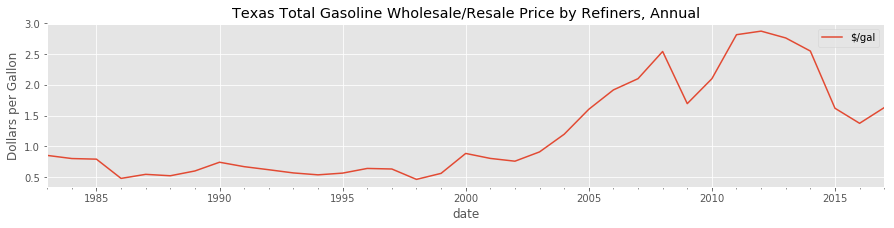

In [15]:
plot_series(ser)

---
## Series to Dataframe w/Name of Series
- Just like previous but returns full name of series as column name

In [16]:
def df_series_all(dic):
    '''input" dict
    output: dataframe
    convert dictionary data into dataframe'''
    # if statement to convert date
    name = dic['series'][0]['series_id']
    if dic['series'][0]['f'] == 'M':
        #201002
        fmat = '%Y%m'
    else:
        fmat= None
    # select data
    plot_data = dic['series'][0]['data']
    # create dataframe
    df = pd.DataFrame.from_dict(plot_data)
    # rename cols
    df.rename(columns={0: 'date',1: name,}, 
              inplace=True)
    # change to datetime index
    df.date = pd.to_datetime(df['date'],format=fmat)
    df.set_index('date', inplace=True)
    df.sort_index(inplace=True)
    return df

In [17]:
df_series_all(ser)

,PET.EMA_EPM0_PWG_STX_DPG.A
date,
1983-01-01,0.853
1984-01-01,0.802
1985-01-01,0.792
1986-01-01,0.479
1987-01-01,0.545
1988-01-01,0.522
1989-01-01,0.600
1990-01-01,0.742
1991-01-01,0.670


---
##  dataframe name

In [18]:
def data_frame_name(dic):
    '''convert dictionary data into dataframe'''
    # if statement to convert date
    if dic['series'][0]['f'] == 'M':
        #201002
        fmat = '%Y%m'
    else:
        fmat= None
    # select data
    name =  dic['series'][0]['series_id']
    plot_data = dic['series'][0]['data']
    # create dataframe
    df = pd.DataFrame.from_dict(plot_data)
    # rename cols
    df.rename(columns={0: 'date',1: name,}, 
              inplace=True)
    # change to datetime index
    df.date = pd.to_datetime(df['date'],format=fmat)
    df.set_index('date', inplace=True)
    df.sort_index(inplace=True)
    return df

In [19]:
data_frame_name(ser)

,PET.EMA_EPM0_PWG_STX_DPG.A
date,
1983-01-01,0.853
1984-01-01,0.802
1985-01-01,0.792
1986-01-01,0.479
1987-01-01,0.545
1988-01-01,0.522
1989-01-01,0.600
1990-01-01,0.742
1991-01-01,0.670


---
# `series_id` to DataFrame

- This function returns a dataframe from a `series_id`

- it calls the `series()` method that we previously created

In [20]:
def series_to_df(series_id,api_key):
    '''combine two function to return
    data from api call'''
    json_data = get_series(series_id,api_key)
    name = json_data['series'][0]['name']
    df = data_frame_name(json_data)
    return df

In [21]:
ser_id

'PET.EMA_EPM0_PWG_STX_DPG.A'

In [22]:
series_to_df(ser_id,API_KEY)

,PET.EMA_EPM0_PWG_STX_DPG.A
date,
1983-01-01,0.853
1984-01-01,0.802
1985-01-01,0.792
1986-01-01,0.479
1987-01-01,0.545
1988-01-01,0.522
1989-01-01,0.600
1990-01-01,0.742
1991-01-01,0.670


---
# multiframe
- this function gets list of series_id's
- retuns a dataframe of each series_id as columns

In [23]:
ser_list = ['PET.EMA_EPMP_PTA_STX_DPG.M','PET.EMA_EPMP_PTA_NUS_DPG.M']

In [24]:
def mul_frames(ser_list,api_key):
    '''input list of series
    output: dataframe with data'''
    
    series_list = []
    for i in ser_list:
        ser_data = get_series(i,api_key)
        series_list.append(ser_data)
    
    frames = []
    for j in series_list:
        data = df_series_all(j)
        frames.append(data)
    # concat frames
    df  = pd.concat(frames, axis=1, sort=False)
    # drop duplicate date columns
    df = df.T.drop_duplicates().T
    # convert to datetime,axis,and drop date col
    #df['date'] = pd.to_datetime(df['date'])
    #df.set_index(df['date'],inplace=True)
    #df.drop(['date'],axis=1,inplace=True)
    #df.sort_index(inplace=True)
    return df

In [25]:
mf_df = mul_frames(ser_list,API_KEY)
mf_df

,PET.EMA_EPMP_PTA_STX_DPG.M,PET.EMA_EPMP_PTA_NUS_DPG.M
date,,
1983-01-01,1.113,1.078
1983-02-01,1.081,1.037
1983-03-01,1.073,1.019
1983-04-01,1.055,1.037
1983-05-01,1.082,1.067
1983-06-01,1.121,1.078
1983-07-01,1.106,1.083
1983-08-01,1.103,1.080
1983-09-01,1.106,1.068


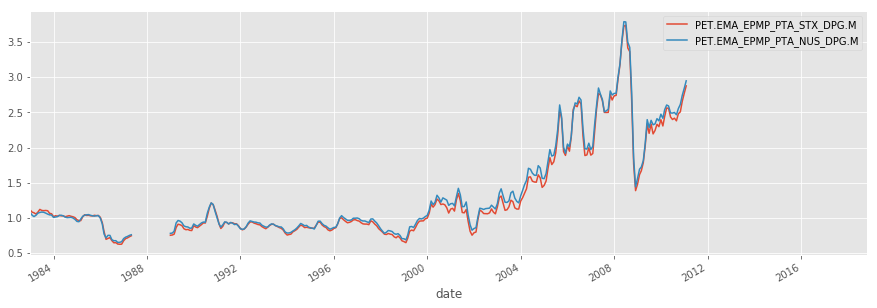

In [26]:
mf_df.plot(figsize=(15,5))